DOKUMENTASI PENGOLAHAN DATA SKRIPSI (ANTONIUS AYODYA/393297)

Proses import semua fungsi yang dibutuhkan dalam pengolahan data

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer
import pingouin as pg
%matplotlib inline
##Line di atas merupakan jajaran fungsi yang digunakan untuk menghitung statistik dari penelitian

Proses membaca spreadsheet data dan mengalokasikan item ke dalam masing masing variabel, data yang telah distandarisasikan kemudian dijadikan file comma separated value(.csv)

In [3]:
df = pd.read_csv("spreadsheet_skripsi_angka.csv")
df_variabel = df.loc[:, '1':'53']
df_standardized = df_variabel.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
variabel = {"usability" : ['1', '7'],
            "narration" : ['8', '14'], 
            "play_engrossment" : ['15', '20'],
            "enjoyment" : ['21', '23'],
            "creativity_freedom" : ['24', '30'], 
            "audio_aesthetic" : ['31', '34'], 
            "personal_gratification" : ['35', '40'],
            "social_connectivity" : ['41', '44'],
            "visual_aesthetic" : ['45', '47'], 
            "satisfaction" : ['48', '50'], 
            "buying_intention" : ['51', '53']}

for kriteria, batasan in variabel.items():
    df_standardized[kriteria] = df_standardized.loc[:, batasan[0]:batasan[1]].mean(axis = 1)
df_standardized['game'] = df["Pilih salah satu dari permainan di bawah yang akan anda nilai"]
df_standardized.to_csv('dataframe_standardized.csv')

Uji Cronbach's Alpha menggunakan fungsi buatan manual

In [4]:
##pengujian cronbach's alpha secara manual
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)
    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))
for kriteria, batasan in variabel.items():
    print(kriteria," = ", CronbachAlpha(df.loc[:, batasan[0]:batasan[1]]))

usability  =  0.7469858508617346
narration  =  0.9436679722785917
play_engrossment  =  0.9473951056421253
enjoyment  =  0.9906146594888318
creativity_freedom  =  0.9410577538649261
audio_aesthetic  =  0.9739965565878107
personal_gratification  =  0.8723971937156306
social_connectivity  =  0.9396548710583922
visual_aesthetic  =  0.7400128177739799
satisfaction  =  0.9858550753097634
buying_intention  =  0.9927384273478992


Uji Cronbach's Alpha menggunakan fungsi bawaan

*2 jenis uji cronbach's alpha digunakan untuk memastikan bahwa nilai cronbach alpha konsisten

Analisis regresi pada model pertama yang diteliti

In [6]:
x = df_standardized.loc[:, 'usability':'visual_aesthetic']
y = df_standardized['satisfaction'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
##mod.coef_ ##coef sklearn
##mod.intercept_ ##intercept sklearn
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.690
Method:                 Least Squares   F-statistic:                              38.59
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    4.97e-34
Time:                        15:14:00   Log-Likelihood:                         -103.47
No. Observations:                 152   AIC:                                      224.9
Df Residuals:                     143   BIC:                                      252.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Analisis regresi pada model kedua yang diteliti

In [7]:
x = df_standardized['satisfaction'].values.reshape(-1, 1)
y = df_standardized['buying_intention'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
print(mod.summary())
##x1 adalah variabel satisfaction/kepuasan

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.481
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              140.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.83e-23
Time:                        15:14:00   Log-Likelihood:                         -136.52
No. Observations:                 152   AIC:                                      275.0
Df Residuals:                     151   BIC:                                      278.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Uji normalitas variabel yang diteliti

In [8]:
b = df_standardized["satisfaction"]
alpha = 1e-2 ##alpha adalah 0.01
for kriteria, batasan in variabel.items():
    a = df_standardized[kriteria]
    x = np.concatenate((a, b))
    k2, p = stats.normaltest(x)
    print(kriteria, " = ", p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution     
        print("The null hypothesis for", kriteria, "can be rejected")
    else:
        print("The null hypothesis", kriteria, "cannot be rejected")

usability  =  6.915137274567453e-06
The null hypothesis for usability can be rejected
narration  =  0.00027119473628158365
The null hypothesis for narration can be rejected
play_engrossment  =  0.0004512236377712715
The null hypothesis for play_engrossment can be rejected
enjoyment  =  7.966760116439095e-07
The null hypothesis for enjoyment can be rejected
creativity_freedom  =  0.00010420689721830948
The null hypothesis for creativity_freedom can be rejected
audio_aesthetic  =  6.816440631768866e-08
The null hypothesis for audio_aesthetic can be rejected
personal_gratification  =  1.0733230069304794e-07
The null hypothesis for personal_gratification can be rejected
social_connectivity  =  7.606462451669932e-09
The null hypothesis for social_connectivity can be rejected
visual_aesthetic  =  1.924797061790322e-09
The null hypothesis for visual_aesthetic can be rejected
satisfaction  =  1.3846394640536473e-05
The null hypothesis for satisfaction can be rejected
buying_intention  =  0.000

In [9]:
stats.shapiro
b = df_standardized["buying_intention"]
alpha = 1e-2 ##alpha adalah 0.01
for kriteria, batasan in variabel.items():
    a = df_standardized[kriteria]
    x = np.concatenate((a, b))
    k2, p = stats.normaltest(x)
    print(kriteria, " = ", p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution     
        print("The null hypothesis for", kriteria, "can be rejected")
    else:
        print("The null hypothesis", kriteria, "cannot be rejected")

usability  =  0.012188155633014055
The null hypothesis usability cannot be rejected
narration  =  0.004223593239732202
The null hypothesis for narration can be rejected
play_engrossment  =  0.010262212746425255
The null hypothesis play_engrossment cannot be rejected
enjoyment  =  0.00010463336224089735
The null hypothesis for enjoyment can be rejected
creativity_freedom  =  0.004265287157361789
The null hypothesis for creativity_freedom can be rejected
audio_aesthetic  =  7.771336403063211e-06
The null hypothesis for audio_aesthetic can be rejected
personal_gratification  =  5.8817452762657914e-05
The null hypothesis for personal_gratification can be rejected
social_connectivity  =  2.880543373663857e-06
The null hypothesis for social_connectivity can be rejected
visual_aesthetic  =  1.1487931909687374e-07
The null hypothesis for visual_aesthetic can be rejected
satisfaction  =  0.0007523632279586865
The null hypothesis for satisfaction can be rejected
buying_intention  =  0.0008007151

Analisis korelasi antar variabel yang disajikan dalam bentuk heatmap

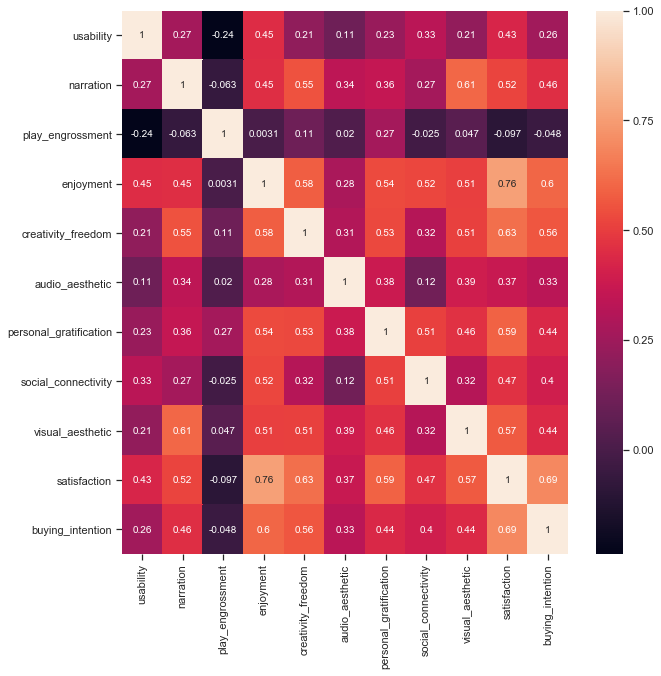

In [10]:
df_variabel_regresi = df_standardized.loc[0:,'usability':'buying_intention']
cormat = df_variabel_regresi.corr()
top_corr_features = cormat.index
plt.figure(figsize = (10,10))
sns.heatmap(df_variabel_regresi[top_corr_features].corr(), annot = True)

Standar deviasi dan rerata dari tiap variabel

In [11]:
print(df_standardized.loc[0:, 'usability':'buying_intention'].std()) 
print(df_standardized.loc[0:, 'usability':'buying_intention'].mean())

usability                 0.611890
narration                 0.755753
play_engrossment          0.760032
enjoyment                 0.856759
creativity_freedom        0.759975
audio_aesthetic           0.876043
personal_gratification    0.761093
social_connectivity       0.768727
visual_aesthetic          0.914180
satisfaction              0.887957
buying_intention          0.827463
dtype: float64
usability                -2.519914e-17
narration                 2.629476e-17
play_engrossment         -2.994681e-17
enjoyment                -4.797880e-17
creativity_freedom        1.687247e-16
audio_aesthetic           9.057083e-17
personal_gratification    2.939900e-17
social_connectivity       1.621510e-16
visual_aesthetic         -5.185910e-17
satisfaction             -1.219785e-16
buying_intention          5.770238e-17
dtype: float64


Analisis deskriptif berdasarkan pembagian demografi berdasar umur (umur sampai dengan 23 dan umur di atas 23 tahun)

In [12]:
dfumur = df.loc[:, 'Umur':'53']
df24 = dfumur[dfumur['Umur']>23]
dfv24 = df24.loc[:, '1':'53']
dfstd24 = dfv24.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
dfstd24['usability'] = dfstd24.loc[:,'1':'7'].mean(axis= 1)
dfstd24['naration'] = dfstd24.loc[:, '8' : '14'].mean(axis = 1)
dfstd24['play_engrossment'] = dfstd24.loc[:, '15' : '20'].mean(axis = 1)
dfstd24['enjoyment'] = dfstd24.loc[:, '21' : '23'].mean(axis = 1)
dfstd24['creativity_freedom'] = dfstd24.loc[:, '24' : '30'].mean(axis = 1)
dfstd24['audio_aesthetic'] = dfstd24.loc[:, '31' : '34'].mean(axis = 1)
dfstd24['personal_gratification'] = dfstd24.loc[:, '35' : '40'].mean(axis = 1)
dfstd24['social_connectivity'] = dfstd24.loc[:, '41' : '44'].mean(axis = 1)
dfstd24['visual_aesthetic'] = dfstd24.loc[:, '45' : '47'].mean(axis = 1)
dfstd24['satisfaction'] = dfstd24.loc[:, '48' : '50'].mean(axis = 1)
dfstd24['buying_intention'] = dfstd24.loc[:, '51' : '53'].mean(axis = 1)
df23 = dfumur[dfumur['Umur']<=23]
dfv23 = df23.loc[:, '1':'53']
dfstd23 = dfv23.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
dfstd23['usability'] = dfstd23.loc[:,'1':'7'].mean(axis= 1)
dfstd23['naration'] = dfstd23.loc[:, '8' : '14'].mean(axis = 1)
dfstd23['play_engrossment'] = dfstd23.loc[:, '15' : '20'].mean(axis = 1)
dfstd23['enjoyment'] = dfstd23.loc[:, '21' : '23'].mean(axis = 1)
dfstd23['creativity_freedom'] = dfstd23.loc[:, '24' : '30'].mean(axis = 1)
dfstd23['audio_aesthetic'] = dfstd23.loc[:, '31' : '34'].mean(axis = 1)
dfstd23['personal_gratification'] = dfstd23.loc[:, '35' : '40'].mean(axis = 1)
dfstd23['social_connectivity'] = dfstd23.loc[:, '41' : '44'].mean(axis = 1)
dfstd23['visual_aesthetic'] = dfstd23.loc[:, '45' : '47'].mean(axis = 1)
dfstd23['satisfaction'] = dfstd23.loc[:, '48' : '50'].mean(axis = 1)
dfstd23['buying_intention'] = dfstd23.loc[:, '51' : '53'].mean(axis = 1)

In [13]:
##Analisis Regresi demografi umur sampai dengan 23 tahun
x = dfstd23.loc[:, 'usability':'visual_aesthetic']
y = dfstd23['satisfaction'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
##mod.coef_ ##coef sklearn
##mod.intercept_ ##intercept sklearn
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                              35.71
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.95e-31
Time:                        15:14:03   Log-Likelihood:                         -94.888
No. Observations:                 141   AIC:                                      207.8
Df Residuals:                     132   BIC:                                      234.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [14]:
##Analisis regresei untuk demografi dengan umur di atas 23 tahun
x = dfstd24.loc[:, 'usability':'visual_aesthetic']
y = dfstd24['satisfaction'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
##mod.coef_ ##coef sklearn
##mod.intercept_ ##intercept sklearn
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              7251.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    0.000138
Time:                        15:14:03   Log-Likelihood:                          42.320
No. Observations:                  11   AIC:                                     -66.64
Df Residuals:                       2   BIC:                                     -63.06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [15]:
print(dfstd23.loc[:, 'usability':'buying_intention'].std()) ##standar deviasi untuk umur sampai dengan 23 tahun
print(dfstd23.loc[:, 'usability':'buying_intention'].mean()) ##standar deviasi untuk umur sampai dengan 23 tahun

usability                 0.598968
naration                  0.740638
play_engrossment          0.755602
enjoyment                 0.850734
creativity_freedom        0.754881
audio_aesthetic           0.870703
personal_gratification    0.751983
social_connectivity       0.769315
visual_aesthetic          0.910839
satisfaction              0.882118
buying_intention          0.824566
dtype: float64
usability                 3.779483e-17
naration                  1.133845e-16
play_engrossment          5.196789e-17
enjoyment                 2.253910e-17
creativity_freedom       -4.173179e-17
audio_aesthetic           4.724353e-17
personal_gratification    7.066845e-17
social_connectivity      -7.401487e-17
visual_aesthetic          6.850312e-17
satisfaction             -1.889741e-17
buying_intention         -1.952733e-16
dtype: float64


In [16]:
print(dfstd24.loc[:, 'usability':'buying_intention'].std()) ##standar deviasi umur di atas 23 tahun
print(dfstd24.loc[:, 'usability':'buying_intention'].mean()) ##standar deviasi umur di atas 23 tahun

usability                 0.792828
naration                  0.944980
play_engrossment          0.839176
enjoyment                 0.962389
creativity_freedom        0.831929
audio_aesthetic           0.967910
personal_gratification    0.895905
social_connectivity       0.825210
visual_aesthetic          0.996427
satisfaction              0.978180
buying_intention          0.893074
dtype: float64
usability                 1.564405e-16
naration                  1.034526e-16
play_engrossment          9.083643e-17
enjoyment                 2.018587e-16
creativity_freedom        5.046468e-17
audio_aesthetic          -2.018587e-17
personal_gratification   -8.074349e-17
social_connectivity      -2.523234e-17
visual_aesthetic         -1.614870e-16
satisfaction              1.204844e-16
buying_intention          8.074349e-17
dtype: float64


In [18]:
df_standardized.sort_values("game", inplace = True)
df_standardized['game'] = df_standardized['game'].astype('category').cat.codes
def game(x):
    return df_standardized.loc[df_standardized['game'] == x]
for permainan in range(0, 5):
    x = game(permainan)["satisfaction"].values.reshape(-1, 1)
    y = game(permainan)['buying_intention'].values.reshape(-1, 1)
    regressor = LinearRegression()
    model = regressor.fit(x, y)
    y_pred = regressor.predict(x)
    mod = sm.OLS(y, x).fit()
    ##mod.coef_ ##coef sklearn
    ##mod.intercept_ ##intercept sklearn
    if permainan == 0:
        print("CSGO")
    if permainan == 1:
        print("Dota2")
    if permainan == 2:
        print("MLBB")
    if permainan == 3:
        print("PUBG")
    if permainan == 4:
        print("POGO")
    print(mod.summary())

CSGO
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              30.09
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.72e-05
Time:                        15:14:04   Log-Likelihood:                         -15.027
No. Observations:                  20   AIC:                                      32.05
Df Residuals:                      19   BIC:                                      33.05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [33]:
def game(x):
    return df_standardized.loc[df_standardized['game'] == x]
for permainan in range(0, 5):
    if permainan == 0:
        df_cs = game(permainan).loc[:, "usability":"game"]
    if permainan == 1:
        df_dota = game(permainan).loc[:, "usability":"game"]
    if permainan == 2:
        df_mlbb = game(permainan).loc[:, "usability":"game"]
    if permainan == 3:
        df_pubg = game(permainan).loc[:, "usability":"game"]
    if permainan == 4:
        df_pogo = game(permainan).loc[:, "usability":"game"]
mermer = [df_cs, df_dota, df_mlbb, df_pubg]
df_comp = pd.concat(mermer)
    ##x = game(permainan).loc[:, "usability":"visual_aesthetic"]
    ##y = game(permainan)['satisfaction'].values.reshape(-1, 1)
    ##regressor = LinearRegression()
    ##model = regressor.fit(x, y)
    ##y_pred = regressor.predict(x)
    ##mod = sm.OLS(y, x).fit()
    ##mod.coef_ ##coef sklearn
    ##mod.intercept_ ##intercept sklearn
    ##sort = mod.params
    ##sort.sort_values(ascending = False)
    ##if permainan == 0:
        ##print("CSGO")
    ##if permainan == 1:
        ##print("Dota2")
    ##if permainan == 2:
        ##print("MLBB")
    ##if permainan == 3:
        ##print("PUBG")
    ##if permainan == 4:
        ##print("POGO")
    ##print(mod.summary())
    ##print(sort.sort_values(ascending = False))

In [35]:
x = df_comp.loc[:, 'usability':'visual_aesthetic']
y = df_comp['satisfaction'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
##mod.coef_ ##coef sklearn
##mod.intercept_ ##intercept sklearn
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              30.10
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    6.24e-27
Time:                        15:25:21   Log-Likelihood:                         -90.077
No. Observations:                 130   AIC:                                      198.2
Df Residuals:                     121   BIC:                                      224.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [38]:
x = df_pogo.loc[:, 'usability':'visual_aesthetic']
y = df_pogo['satisfaction'].values.reshape(-1, 1)
regressor = LinearRegression()
model = regressor.fit(x, y)
y_pred = regressor.predict(x)
mod = sm.OLS(y, x).fit()
##mod.coef_ ##coef sklearn
##mod.intercept_ ##intercept sklearn
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              11.15
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    8.92e-05
Time:                        15:25:51   Log-Likelihood:                         -6.6149
No. Observations:                  22   AIC:                                      31.23
Df Residuals:                      13   BIC:                                      41.05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [39]:
print(df_comp.loc[:, 'usability':'buying_intention'].std()) ##standar deviasi umur di atas 23 tahun
print(df_comp.loc[:, 'usability':'buying_intention'].mean()) ##standar deviasi umur di atas 23 tahun

usability                 0.609792
narration                 0.727304
play_engrossment          0.735294
enjoyment                 0.854739
creativity_freedom        0.740857
audio_aesthetic           0.775648
personal_gratification    0.741401
social_connectivity       0.719197
visual_aesthetic          0.938632
satisfaction              0.873067
buying_intention          0.807377
dtype: float64
usability                -0.039523
narration                -0.081236
play_engrossment          0.087588
enjoyment                -0.059119
creativity_freedom       -0.027970
audio_aesthetic           0.096813
personal_gratification    0.035656
social_connectivity       0.007168
visual_aesthetic         -0.049176
satisfaction             -0.042849
buying_intention         -0.039913
dtype: float64


In [42]:
print(df_pogo.loc[:, 'usability':'buying_intention'].std()) ##standar deviasi umur di atas 23 tahun
print(df_pogo.loc[:, 'usability':'buying_intention'].mean()) ##standar deviasi umur di atas 23 tahun

usability                 0.584100
narration                 0.758474
play_engrossment          0.710121
enjoyment                 0.800459
creativity_freedom        0.864788
audio_aesthetic           1.192368
personal_gratification    0.856870
social_connectivity       1.034210
visual_aesthetic          0.702701
satisfaction              0.953189
buying_intention          0.922430
dtype: float64
usability                 0.233543
narration                 0.480029
play_engrossment         -0.517564
enjoyment                 0.349342
creativity_freedom        0.165279
audio_aesthetic          -0.572075
personal_gratification   -0.210696
social_connectivity      -0.042356
visual_aesthetic          0.290587
satisfaction              0.253197
buying_intention          0.235850
dtype: float64


In [52]:
df_standardized[(df_standardized['game']>=0) & (df_standardized['game']<=3)]

,1,2,3,4,5,6,7,8,9,10,...,play_engrossment,enjoyment,creativity_freedom,audio_aesthetic,personal_gratification,social_connectivity,visual_aesthetic,satisfaction,buying_intention,game
151,-0.713256,-0.764053,0.635008,0.875680,-0.778659,-1.751740,0.070052,-3.205302,-1.940949,-2.386128,...,-0.662115,0.048003,-0.507087,-3.116089,0.148048,0.689681,-0.562373,-0.904910,-0.886261,0
41,1.035372,0.931364,0.635008,0.875680,1.130311,1.111319,0.957380,-3.205302,-1.940949,0.611322,...,-1.521791,1.110799,1.250617,0.728689,-0.601226,0.689681,-1.415963,0.101947,0.836132,0
8,1.035372,0.931364,-0.763850,0.875680,0.175826,-0.797387,-1.704603,-0.437087,-1.401600,0.011832,...,0.510770,-0.445518,-1.827337,0.040141,0.914351,0.316517,-0.852967,-1.148737,-1.677759,0
88,1.035372,0.931364,0.635008,0.875680,1.130311,1.111319,0.957380,0.947021,1.295149,1.210812,...,-0.211151,1.110799,1.250617,1.110626,0.914351,0.689681,0.899117,1.108804,1.231881,0
73,-2.461885,0.083655,-1.463280,0.875680,0.175826,-0.797387,-1.704603,-2.513248,-1.401600,-1.786638,...,-0.403087,0.156744,0.282424,-1.037559,-0.807917,0.420597,-1.735687,0.005568,-0.264289,0
20,-1.587571,0.083655,0.635008,-0.291893,0.175826,-0.797387,-1.704603,-1.129141,-0.322900,-0.587658,...,-0.401509,-0.195048,-0.176900,-0.261021,-0.451616,-0.394933,-0.562373,-0.141880,-0.971712,0
17,1.035372,0.931364,0.635008,-0.291893,1.130311,0.156966,0.957380,0.947021,-1.401600,-2.386128,...,-1.724412,0.138595,-1.642603,1.110626,0.784092,0.316517,-3.178987,0.229876,0.528584,0
102,-0.713256,0.083655,0.635008,0.875680,-0.778659,-1.751740,-1.704603,-1.129141,-0.322900,0.011832,...,0.740513,-1.283413,-1.147335,-0.817173,-0.481539,0.689681,-0.848133,-2.027665,-1.147536,0
135,0.161058,0.931364,0.635008,0.875680,0.175826,0.156966,0.070052,-2.513248,-0.862250,-1.786638,...,1.017615,0.867748,0.665105,1.110626,0.914351,0.689681,0.899117,0.133498,0.878857,0
104,-1.587571,0.083655,-3.561568,0.875680,0.175826,-0.797387,-1.704603,-0.437087,-0.322900,-1.786638,...,0.094942,-0.086307,0.099253,-0.021712,0.128437,0.689681,0.024283,0.345773,0.880232,0
